# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [179]:
def train(X, T, learning_rate, n_epochs, verbose=False):
    
      # number of rows in data equals the number of samples

    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.mean(X, axis=0)
    Xstds = np.std(X, axis=0)
    
    Tmeans = np.mean(T, axis=0)
    Tstds = np.std(T, axis=0)
    
    # Use the means and standard deviations to standardize X and T
    X = (X - Xmeans) / Xstds
    np.mean(X, axis=0), np.std(X, axis=0)
    T = (T - Tmeans) / Tstds
    np.mean(T, axis=0), np.std(T, axis=0)
    
    # Insert the column of constant 1's as a new initial column in X
    X = np.insert(X, 0, 1, 1)
    
    #X.shape, X1.shape
    n_samples, n_inputs = X.shape
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    w = np.zeros((n_inputs, 1)) 

    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            y = X[n:n + 1, :] @ w      # predicted value, y, for sample n
            error = T[n:n + 1, :] - y  
            # update weights by fraction of negative derivative of square error with respect to weights
            w += learning_rate * X[n:n + 1, :].T * error
            # Add the squared error to sqerror_sum
            sqerror_sum += error ** 2

        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            #rmse = np.sqrt(sqerror_sum / n_samples)
            #rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            Y = X @ w
            ER = rmse(T,Y)
            print(f'Epoch {epoch + 1} RMSE {ER:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [180]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans']) / model['Xstds']
    # Predict output values using weights in model
    w = model['w']
    X = np.insert(X, 0, 1, 1)
    out = X @ w
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    # Predict output values using weights in model
    # Return the unstandardized output values
    out = (out*model['Tstds']) + model['Tmeans']
    return out

In [181]:
def rmse(A, B):
    out = np.sqrt(np.sum((A - B)**2)/A.shape[0]) 
    return out
#np.sqrt(np.sum((T-Y)**2)/Y.shape[0]), Y.shape[0]



Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

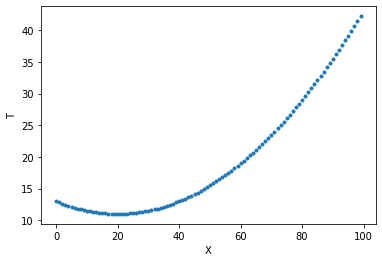

In [182]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [183]:
model = train(X, T, 0.001, 50, verbose=True)
model

Epoch 5 RMSE 0.68
Epoch 10 RMSE 0.52
Epoch 15 RMSE 0.44
Epoch 20 RMSE 0.42
Epoch 25 RMSE 0.41
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40


{'w': array([[4.62267158e-04],
        [9.23968364e-01]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

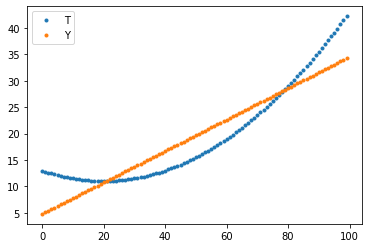

In [184]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

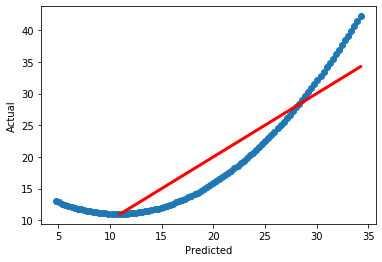

In [185]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~anderson/cs445/notebooks/weather.data)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [186]:
import pandas
df = pandas.read_csv('weather.data',delim_whitespace=True,na_values='***')
df

,Year,Mo,Dy,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,2000,1,1,3.477,11.858,-4.905,0.331,0.614,0.233,0.00,8.252
1,2000,1,2,0.363,6.415,-5.690,0.396,0.872,0.392,0.00,8.742
2,2000,1,3,-4.448,1.153,-10.049,0.185,0.573,0.274,0.00,10.741
3,2000,1,4,-2.465,6.562,-11.493,0.245,0.710,0.254,0.00,4.116
4,2000,1,5,1.558,6.723,-3.608,0.228,0.540,0.132,0.00,15.974
5,2000,1,6,-3.041,4.760,-10.842,0.195,0.649,0.152,0.00,6.468
6,2000,1,7,-3.142,3.954,-10.238,0.249,0.709,0.321,0.00,7.115
7,2000,1,8,-0.511,8.015,-9.036,0.295,0.785,0.220,0.00,13.387
8,2000,1,9,3.529,7.330,-0.271,0.219,0.412,0.148,0.00,14.700
9,2000,1,10,1.094,6.861,-4.674,0.373,0.835,0.295,0.00,14.641


## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [187]:
df.isna().sum()

Year      0
Mo        0
Dy        0
tave     33
tmax     33
tmin     33
vp       33
rhmax    33
rhmin    33
pp       33
gust     33
dtype: int64

## 5 points:

If there are missing values, remove samples that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [188]:
df = df.dropna()
df.isna().sum()

Year     0
Mo       0
Dy       0
tave     0
tmax     0
tmin     0
vp       0
rhmax    0
rhmin    0
pp       0
gust     0
dtype: int64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values of
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

As a hint on how to do this, here is a list with these column names:

In [189]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

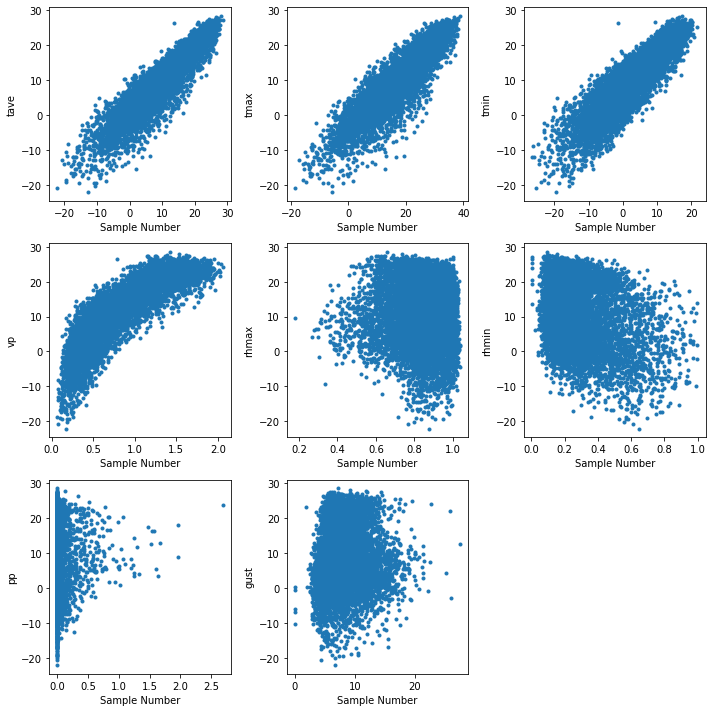

In [190]:
#a=df.iloc[:, 4:].values
#b=df.iloc[:, 0:3].values
#data = np.concatenate(df.iloc[:, 0:3].values, df.iloc[:, 4:8].values)
#data = np.concatenate((a, b), axis=1)
X = df.iloc[:-1, 3:].values
T = df.iloc[1:, 3:4].values
Y = np.arange(0, 7294).reshape(-1, 1)  # make X a 100 x 1 matrix
ncol =X.shape[1]
plt.figure(figsize=(10, 10))

for c in range(ncol):
    plt.subplot(3, 3, c+1)
    plt.plot(X[:, c],T,'.')
    plt.xlabel('Sample Number')
    plt.ylabel(Xnames[c])
    plt.tight_layout()


## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

In [191]:
model = train(X, T, 0.001, 100, verbose=True)
model

Epoch 10 RMSE 0.33
Epoch 20 RMSE 0.33
Epoch 30 RMSE 0.33
Epoch 40 RMSE 0.33
Epoch 50 RMSE 0.33
Epoch 60 RMSE 0.33
Epoch 70 RMSE 0.33
Epoch 80 RMSE 0.33
Epoch 90 RMSE 0.33
Epoch 100 RMSE 0.33


{'w': array([[-0.01241061],
        [ 0.27372925],
        [ 0.32992815],
        [ 0.19137443],
        [ 0.17965519],
        [-0.0338301 ],
        [-0.00035767],
        [ 0.01900232],
        [-0.11583281]]),
 'Xmeans': array([10.2909501 , 17.63310269,  2.9487912 ,  0.79909528,  0.82770661,
         0.29674253,  0.02790513,  8.24348999]),
 'Xstds': array([ 9.59225991, 10.64262623,  9.09179158,  0.45833066,  0.12976821,
         0.17032268,  0.12258861,  3.10079319]),
 'Tmeans': array([10.29103414]),
 'Tstds': array([9.59220289])}

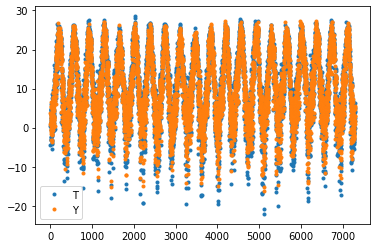

In [110]:
Y = use(X, model)
old_pred = Y
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()


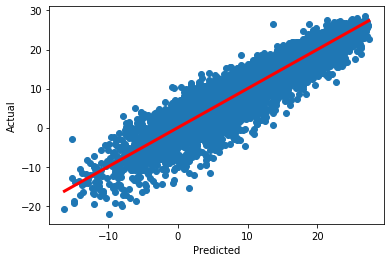

In [111]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

# Answer
We can clearly see from the graph that the actual values vs the predicted values follows the 45 degrees angle. 

the rmse value reached the minimum when using a higher learning rate of 0.01 or even 0.001 and reached the minimum error in 10 epochs.

The rmse value reached the minimum value in 40 epochs for a learning rate of 0.00001

The rmse value has reached the minimum value in 100 epochs when using lower learning rate of 0.000001

The rmse value still didnt reached the minimum value even after 1000 epochs for a learning rate of 0.0000001

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [112]:
Xnames_new= ["bias"] + Xnames
new =np.transpose(Xnames)
new_df = pandas.DataFrame(model['w'], index=Xnames_new,columns=list(['Weights']))
new_df

,Weights
bias,-0.000015
tave,0.245340
tmax,0.240846
tmin,0.235762
vp,0.229027
rhmax,-0.016474
rhmin,-0.059768
pp,0.002332
gust,-0.071005


# Answer

We can clearly see from the weights that `tave`, `tmax`, `tmin` and `vp` are the major contributors for predicting the temperature values

## Grading and Check-in

Your notebook will be partially run and graded automatically. Test this grading process by first downloading [A1grader.zip](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A1grader.zip) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.

For the grading script to run correctly, you must first name this notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

In [1]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Gannavarapu-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.

C:\Users\ganna\OneDrive\Documents\CSU\Spring2020\Into to ML Execution Grade is 60 / 60

 __ / 5 Rea

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [114]:
X = df.iloc[:-1, 3:].values
T = df.iloc[:, 3:4].values

T_new = T[1:, :] -  T[:-1, :]
X.shape, T.shape
#new1_df = pandas.DataFrame(X,columns=Xnames)    #list(['Weights', 'as']))
#T_df = pandas.DataFrame(T)  #,columns=Xnames)    #list(['Weights', 'as']))
#out = pandas.concat([new1_df, T_df], axis=1, sort=False)
#out
#X[1:, 0:1],  X[:-1, 0:1]
model_new = train(X, T_new, 0.000001, 100, verbose=True)
model_new

Epoch 10 RMSE 0.98
Epoch 20 RMSE 0.97
Epoch 30 RMSE 0.96
Epoch 40 RMSE 0.96
Epoch 50 RMSE 0.95
Epoch 60 RMSE 0.95
Epoch 70 RMSE 0.95
Epoch 80 RMSE 0.94
Epoch 90 RMSE 0.94
Epoch 100 RMSE 0.94


{'w': array([[-1.06702020e-05],
        [-4.26909360e-02],
        [-3.82408245e-02],
        [-4.53180522e-02],
        [ 2.09609534e-03],
        [ 3.44497528e-02],
        [ 5.42113449e-02],
        [ 7.72243585e-03],
        [-1.59042001e-01]]),
 'Xmeans': array([10.2909501 , 17.63310269,  2.9487912 ,  0.79909528,  0.82770661,
         0.29674253,  0.02790513,  8.24348999]),
 'Xstds': array([ 9.59225991, 10.64262623,  9.09179158,  0.45833066,  0.12976821,
         0.17032268,  0.12258861,  3.10079319]),
 'Tmeans': array([8.40416781e-05]),
 'Tstds': array([3.46255837])}

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.

In [115]:
X.shape , model_new['Xmeans'].shape

((7294, 8), (8,))

In [116]:
X = (X - model_new['Xmeans']) / model_new['Xstds']
X.shape

(7294, 8)

In [117]:
w = model_new['w']
w.shape

(9, 1)

In [118]:
X = np.insert(X, 0, 1, 1)


In [119]:
out = X @ w
out

array([[ 0.00885695],
       [ 0.14045041],
       [-0.01793211],
       ...,
       [ 0.02909102],
       [ 0.32928848],
       [ 0.14087619]])

In [120]:
# Unstandardize the predicted output values using Tmeans and Tstds in model
# Predict output values using weights in model
# Return the unstandardized output values
out = ((out*model['Tstds']) + model['Tmeans']) + T[:-1,:]
out


array([[ 3.53325203],
       [ 0.43785424],
       [-4.39553491],
       ...,
       [ 2.54411234],
       [ 1.68954863],
       [ 5.06591443]])

In [121]:
rmse(old_pred,out)

1.1795951273861334